In [245]:
# import libraries
import pandas as pd
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# disable warnings, use w caution
import warnings
warnings.filterwarnings('ignore')

# project specific libs
import os
import matplotlib.pyplot as plt
import pathlib

In [2]:
# project specific path
path = '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/'

##### Meta Analyses Setup #####

In [95]:
# define replacements prior to analysis
sub_dict=  {'healthy control': 'HC',
            'healthy': 'HC',
            'Healthy': 'HC',
            'HLT': 'HC',
            'NORA':'RA',
            'SLE-G': 'SLE',
            'axial spondyloarthritis': 'AxSpA',
            'sle': 'SLE',
            'ss': 'SjD',
            'psa': 'PsA',
            'pso': 'PsO',
            'nss': 'NSS',
            'non-sjogrens sicca': 'NSS',
            'pSS patients without treament': 'SjD'
           }

dx_sub_dict = {'host_disease':'Diagnosis'}

jobs = ['jobs09','jobs10','jobs12','jobs13',
        'jobs41', # weird SLE cohort
        'jobs43',
        'jobs44','jobs45','jobs46','jobs47','jobs49','jobs50','jobs51',
       'jobs52']


### all data
j_to_res = {
    'jobs09': {
        'Diagnosis': 'RA',
        'Cohort': 'AMPAIM',
        'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs09/lefse_results.res'
    },
    'jobs10':{
        'Diagnosis': 'PsO',
        'Cohort': 'AMPAIM',
        'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs10/lefse_results.res'
    },
    'jobs11':{
        'Diagnosis': 'PsA',
        'Cohort': 'AMPAIM',
        'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs11/lefse_results.res'
    },
    'jobs12':{
        'Diagnosis': 'SjD',
        'Cohort': 'AMPAIM',
        'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs12/lefse_results.res'
    },
    'jobs13':{
        'Diagnosis': 'SLE',
        'Cohort': 'AMPAIM',
        'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs13/lefse_results.res'
    },
    'jobs14':{
        'Diagnosis': 'NSS',
        'Cohort': 'AMPAIM',
        'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs14/lefse_results.res'
    },
    'jobs41':{
        'Diagnosis': 'SLE',
        'Cohort': 'Valid1SLE',
        'LEfSe_path': path + 'outputs/jobs41/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-HC-or-SLE-G.Diagnosis.NA.tsv'
    },
    'jobs43':{
        'Diagnosis': 'AxSpA',
        'Cohort': 'Valid2AxSpA',
        'LEfSe_path': path + 'outputs/jobs43/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv'
    },
    'jobs44':{
        'Diagnosis': 'SjD',
        'Cohort': 'Valid3SjD',
        'LEfSe_path': path + 'outputs/jobs44/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv'
    },
    'jobs45':{
        'Diagnosis': 'PsO',
        'Cohort': 'Valid5PsO',
        'LEfSe_path': path + 'outputs/jobs45/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv'
    },
    'jobs46':{
        'Diagnosis': 'RA',
        'Cohort': 'Valid4RA',
        'LEfSe_path': path + 'outputs/jobs46/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv'
    },
    'jobs47':{
        'Diagnosis': 'PsO',
        'Cohort': 'Valid8PsO',
        'LEfSe_path': path + 'outputs/jobs47/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv'
    },
    'jobs48':{
        'Diagnosis': 'SLE',
        'Cohort': 'Valid6SLE',
        'LEfSe_path': path + 'outputs/jobs48/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv'
    },
    'jobs49':{
        'Diagnosis': 'RA',
        'Cohort': 'Valid7RA',
        'LEfSe_path': path + 'outputs/jobs49/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv'
    },
    'jobs50':{
        'Diagnosis': 'PsO',
        'Cohort': 'Valid10PsO',
        'LEfSe_path': path + 'outputs/jobs50/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv'
    },
    'jobs51':{
        'Diagnosis': 'PsO',
        'Cohort': 'Valid9PsD',
        'LEfSe_path': path + 'outputs/jobs51/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-PsO-or-HC.Diagnosis.NA.tsv'
    }


}


##### Process LEfSe results prior to UpSetR #####

In [11]:
# for AMPAIM

for j in jobs:
    # grab res dict
    res = j_to_res[j]

    # grab df and name columns
    if '.res' in res['LEfSe_path']:
        header = None
    elif '.taxa' in res['LEfSe_path']:
        header = 0
    
    df_lefse = pd.read_csv(res['LEfSe_path'], sep='\t', header=header, names =['Taxa','X','Direction','LDA','p'])
   
    # drop na
    df_lefse = df_lefse[df_lefse['p'] != '-']
    
    # cast to float
    df_lefse['p'] = df_lefse['p'].astype(float)

    # filter on NA 
    df_lefse = df_lefse[~np.isnan(df_lefse['LDA'])]

    # save
    for d in df_lefse.Direction.unique():    
        df = df_lefse[df_lefse['Direction'] == d] 
        df.to_csv(path + 'outputs/jobs100/' + res['Cohort'] + '_' + res['Diagnosis'] + '_' + d + '.tsv', sep='\t')
        

#df = df[np.isnan(df['LDA'])]
#LDAnan = df.Taxa.values

# print(LDAnan)
print(len(df))



39


##### jobs39 #####

In [27]:
# jobs39 is where the first PRJNA will be tested, 16S sequencing
# PRJNA317370
# we need to generate a Q2 mapping file like in OA
q2_oa = pd.read_csv(path + 'outputs/jobs39/oaq2.tsv', sep='\t')

# take columns i think we need
keep = ['BarcodeSequence','LinkerPrimerSequence']

# grab sample IDs
# df_map = q2_oa.loc[:,keep]

df_sra = pd.read_csv(path + 'outputs/jobs39/SraRunTable.txt', sep='\t')
df_sra = df_sra.rename(columns={'Run':'#SampleID'})

# insert in reverse order
for i in keep:
    df_sra.insert(1, i, ['NA' for _ in range(len(df_sra))])

df_sra.to_csv(path + 'outputs/jobs39/qiime_mapping_file.tsv', sep='\t')
df_sra.columns.values
# df_sra['Sample Name']

array(['#SampleID', 'LinkerPrimerSequence', 'BarcodeSequence',
       'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'collection_date',
       'Consent', 'DATASTORE filetype', 'DATASTORE provider',
       'DATASTORE region', 'Experiment', 'geo_loc_name_country',
       'geo_loc_name_country_continent', 'geo_loc_name', 'host',
       'Instrument', 'isolation_source', 'lat_lon', 'Library Name',
       'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Organism',
       'Platform', 'ReleaseDate', 'create_date', 'version', 'Sample Name',
       'SRA Study', '1-Methylhistidine', '3-Methylhistidine', 'Alanine',
       'allo-Isoleucine', 'alpha-Amino-N-butyric-acid',
       'alpha-Aminoadipic-acid', 'Anserine', 'Arginine', 'Asparagine',
       'Aspartic_Acid', 'beta-Alanine', 'beta-Aminoisobutyric-acid',
       'betaine', 'carnitine', 'Carnosine', 'choline', 'Citrulline',
       'Cystathionine_1', 'Cystathionine_2', 'Cystin

##### jobs44 #####

In [148]:
# create mapping file
df = pd.read_csv(path + 'outputs/jobs44/gutonlyCRR.csv')
df = df[df['Run title'].str.contains('fecal')]
df = df.set_index('Accession')

# get diagnosis column
df['DiagnosisOG'] = df['Run title'].map(lambda x: x.split('sample:')[-1])

# create new simplified one
df = df[df['DiagnosisOG'].isin(['healthy control','pSS patients without treament'])]
# pSS patients without treament            90
# pSS patients with 3-6 month treament     46
# non-pSS patient                          43
# healthy control                          40
# pSS patients with 6-12 month treament    11                       

# create new diagnosis
df['Diagnosis'] = df['DiagnosisOG'].map({'healthy control': 'HC', 'pSS patients without treament': 'SjD'})

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Accession')
df.index.name = '#SampleID'

# create host subject id
df['HostSubjectId'] = df['ID']

# drop "ID" it is protected in QIIME
df = df.drop('ID',axis=1)

# export
df.to_csv(path + 'outputs/jobs44/qiime_mapping_file.tsv', sep='\t')
df.head()

,Run title,BioProject accession,Experiment accession,Run data file type,Read filename 1,Read file1 MD5,DownLoad Read file1,Read filename 2,Read file2 MD5,DownLoad Read file2,...,Reference file name,MD5 for reference file,Assembly Name or Accession,Assembly Accession URL,other_db,accession_in_other_db,other_db_url,DiagnosisOG,Diagnosis,HostSubjectId
#SampleID,,,,,,,,,,,,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical
CRR442600,D8:Amplicon sequence of human fecal sample:pSS...,PRJCA008752,CRX385346,fastq,CRR442600_f1.fq.gz (12975507 bytes),3149e0d5588d0cea4b58c1a2706c7e43,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,CRR442600_r2.fq.gz (12152647 bytes),038b8b7280f629bba6e6fa50eb5b78f2,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pSS patients without treament,SjD,8
CRR442603,D11:Amplicon sequence of human fecal sample:pS...,PRJCA008752,CRX385349,fastq,CRR442603_f1.fq.gz (10712320 bytes),854db81c703df4130019c80e717ccad7,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,CRR442603_r2.fq.gz (10213484 bytes),692bcab19cb7f412000af2869de5355f,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pSS patients without treament,SjD,11
CRR442606,D14:Amplicon sequence of human fecal sample:pS...,PRJCA008752,CRX385352,fastq,CRR442606_f1.fq.gz (11509869 bytes),aa3c4d14208bb22f40b7a1813fe5c4fc,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,CRR442606_r2.fq.gz (11022278 bytes),49cdb6984acb61ce32e31d7851bf9468,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pSS patients without treament,SjD,14
CRR442608,D16:Amplicon sequence of human fecal sample:pS...,PRJCA008752,CRX385354,fastq,CRR442608_f1.fq.gz (12899732 bytes),6fb9bfd4498e608a33d0bfdcbbf32c48,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,CRR442608_r2.fq.gz (12309020 bytes),8491d2cd4dfe9d639f256b307f459eda,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pSS patients without treament,SjD,16


##### Jobs 45 #####

In [150]:
# jobs45
df = pd.read_csv(path + 'outputs/jobs45/SraRunTable.txt', sep='\t')

# create host subject ID col
df['HostSubjectId'] = df['Run']
df = df.set_index('Run')

# get diagnosis column
df['Diagnosis'] = df['Sample Name'].map(lambda x: 'PsO' if 'PSORI' in x else 'HC')

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Run')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs45/qiime_mapping_file.tsv', sep='\t')

# check breakdown
df.Diagnosis.value_counts()

# df.head()

Diagnosis
PsO            39
HC             21
categorical     1
Name: count, dtype: int64

##### jobs46 #####

In [155]:
# jobs46
df = pd.read_csv(path + 'outputs/jobs46/SraRunTable.txt', sep='\t')

# create host subject ID col
df['HostSubjectId'] = df['Run']

# df = df[df['Run title'].str.contains('fecal')]
df = df.set_index('Run')

# get diagnosis column
df['Diagnosis'] = df['Sample Name'].map(lambda x: 'RA' if 'RA' in x else 'HC')

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Run')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs46/qiime_mapping_file.tsv', sep='\t')

    
# check 26 HC 26 RA
df.Diagnosis.value_counts()

# df.head()


Diagnosis
RA             26
HC             26
categorical     1
Name: count, dtype: int64

In [156]:
df.columns.values

array(['Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'Collection_Date',
       'Consent', 'DATASTORE filetype', 'DATASTORE provider',
       'DATASTORE region', 'Experiment', 'geo_loc_name_country',
       'geo_loc_name_country_continent', 'geo_loc_name', 'HOST',
       'Instrument', 'lat_lon', 'Library Name', 'LibraryLayout',
       'LibrarySelection', 'LibrarySource', 'Organism', 'Platform',
       'ReleaseDate', 'create_date', 'version', 'Sample Name',
       'SRA Study', 'HostSubjectId', 'Diagnosis'], dtype=object)

##### jobs47 #####

In [157]:
# jobs47
df = pd.read_csv(path + 'outputs/jobs47/SraRunTable.txt', sep='\t')

# create host subject ID col
df['HostSubjectId'] = df['Run']

# df = df[df['Run title'].str.contains('fecal')]
df = df.set_index('Run')

# get diagnosis column
candidates = ['C' + str(x) for x in range(1,28)] # 27 healthy controls, C1...C27

df['Diagnosis'] = df['Sample Name'].map(lambda x: 'HC' if x.split('_')[0] in candidates else 'PsO')

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Run')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs47/qiime_mapping_file.tsv', sep='\t')

# check
df.Diagnosis.value_counts()

# df.head()

Diagnosis
PsO            55
HC             27
categorical     1
Name: count, dtype: int64

In [158]:
df.columns.values

array(['Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'collection_date',
       'Consent', 'DATASTORE filetype', 'DATASTORE provider',
       'DATASTORE region', 'env_broad_scale', 'env_local_scale',
       'env_medium', 'Experiment', 'geo_loc_name_country',
       'geo_loc_name_country_continent', 'geo_loc_name', 'host',
       'Instrument', 'isolate', 'isolation_source', 'lat_lon',
       'Library Name', 'LibraryLayout', 'LibrarySelection',
       'LibrarySource', 'Organism', 'Platform', 'ReleaseDate',
       'create_date', 'version', 'Sample Name', 'SRA Study',
       'HostSubjectId', 'Diagnosis'], dtype=object)

##### jobs48 #####

In [159]:
# jobs48
df = pd.read_csv(path + 'outputs/jobs48/SraRunTable.txt', sep='\t')

# create host subject ID col
df['HostSubjectId'] = df['Run']

# df = df[df['Run title'].str.contains('fecal')]
df = df.set_index('Run')

# get diagnosis column
df['Diagnosis'] = df['Sample Name'].map(lambda x: 'SLE' if 'SF' in x else 'HC')

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Run')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs48/qiime_mapping_file.tsv', sep='\t')

# check
df.Diagnosis.value_counts()

# df.head()

Diagnosis
SLE            26
HC             21
categorical     1
Name: count, dtype: int64

In [160]:
df.columns.values

array(['AGE', 'Assay Type', 'AvgSpotLen', 'Bases', 'BIOMATERIAL_PROVIDER',
       'BioProject', 'BioSample', 'BioSampleModel', 'Bytes',
       'Center Name', 'Consent', 'DATASTORE filetype',
       'DATASTORE provider', 'DATASTORE region', 'Experiment',
       'Instrument', 'isolate', 'Library Name', 'LibraryLayout',
       'LibrarySelection', 'LibrarySource', 'Organism', 'Platform',
       'ReleaseDate', 'create_date', 'version', 'Sample Name', 'sex',
       'SRA Study', 'tissue', 'HostSubjectId', 'Diagnosis'], dtype=object)

##### Jobs49 #####

In [161]:
# jobs49
df = pd.read_csv(path + 'outputs/jobs49/metadata_kb.txt', sep='\t')

# drop random na rows
df = df.dropna()

# dictionary
# CCP   at- risk individual 
# NORA	new onset RA 
# HLT 	Healthy individual
# NG-XXX-XX	Longitudinal study-particiapnt number-timepoint

# create host subject ID col
df['HostSubjectId'] = df['sample_id'].apply(lambda x: x.split('-')[1] if 'NG' in x else x)

# create timepoint column
df['Timepoint'] = df['sample_id'].apply(lambda x: x.split('-')[-1] if 'NG' in x else 1)
                                                            
# probably will keep only first timepoint
df = df.drop_duplicates(subset='HostSubjectId', keep='first', inplace=False)

# # get diagnosis column
df['Diagnosis'] = df['Group']

# create categorical
df = df.reset_index()
df['index'] = df['sample_id']
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('index')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs49/qiime_mapping_file.tsv', sep='\t')

# check
print(df.Diagnosis.value_counts())
# df.sample_id.values
df.head()

Diagnosis
at_risk        124
HLT             22
NORA             8
categorical      1
Name: count, dtype: int64


,sample_id,Group,HostSubjectId,Timepoint,Diagnosis
#SampleID,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical
13,13,at_risk,13,1,at_risk
168,168,at_risk,168,1,at_risk
172,172,at_risk,172,1,at_risk
188,188,at_risk,188,1,at_risk


##### Jobs50 #####

In [162]:
# jobs50
df = pd.read_csv(path + 'outputs/jobs50/SraRunTable.txt', sep='\t')

# create host subject ID col
df['HostSubjectId'] = df['Run']

# df = df[df['Run title'].str.contains('fecal')]
df = df.set_index('Run')

# get diagnosis column
df['Diagnosis'] = df['isolation_source'].map(lambda x: 'PsO' if 'psoria' in x else 'HC')

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Run')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs50/qiime_mapping_file.tsv', sep='\t')

# check
df.Diagnosis.value_counts()

# df.head()

Diagnosis
HC             20
PsO            19
categorical     1
Name: count, dtype: int64

In [163]:
df.columns.values

array(['Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'Collection_Date',
       'Consent', 'DATASTORE filetype', 'DATASTORE provider',
       'DATASTORE region', 'Experiment', 'geo_loc_name_country',
       'geo_loc_name_country_continent', 'geo_loc_name', 'HOST',
       'Instrument', 'isolation_source', 'lat_lon', 'Library Name',
       'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Organism',
       'Platform', 'ReleaseDate', 'create_date', 'version', 'Sample Name',
       'SRA Study', 'HostSubjectId', 'Diagnosis'], dtype=object)

##### jobs 51 #####

In [164]:
# jobs51
df = pd.read_csv(path + 'outputs/jobs51/metadata.txt', sep='\t')

# cast to str
df.SampleID = df.SampleID.astype(int).astype(str)

# check
#df = df[df['Diagnosis'].isin(['HC','PsO and PsA','PsO without PsA'])]
df = df[df['Diagnosis'].isin(['HC','PsO without PsA', 'PsO and PsA', 'HC first degree relatives'])]

# for now we just want PsO, PsA, and HC without first degree relatives
df = df.drop_duplicates()

# keep  only PsO without PsA, PsO and PsA, and HC
df = df[df['Diagnosis'].isin(['PsO without PsA', 'PsO and PsA', 'HC first degree relatives'])]

# rename
df = df.replace({'PsO without PsA': 'PsO', 'PsO and PsA': 'PsA', 'HC first degree relatives': 'HC'})

# create host subject ID col
df['HostSubjectId'] = df['SampleID']

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,1] = '#q2:types' # this should be wherever SampleID is
df = df.set_index('SampleID')
#df.index.name = '#SampleID'

# drop dup for  200826267122
# this removes the PsA instance because that is below the PsO entry
df = df[~df.index.duplicated(keep='first')]

# export
df.to_csv(path + 'outputs/jobs51/qiime_mapping_file.tsv', sep='\t')

# df.Diagnosis.value_counts()
# df.SampleID.value_counts()

df.head()

,index,Diagnosis,HostSubjectId
SampleID,,,
#q2:types,categorical,categorical,categorical
200826267123,60,PsO,200826267123
200826267127,61,PsO,200826267127
200826267121,63,PsO,200826267121
200826267125,64,PsO,200826267125


['d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;__', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;__', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;s__', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;s__', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;s__Alistipes_A_871400 communis', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;s__Alistipes_A_871400 communis', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;s__Alistipes_A_871400 dispar', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;s__Alistipes_A_871400 dispar', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Ba

<Axes: xlabel='d__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A_141781;s__Blautia_A_141781 faecis', ylabel='BSA'>

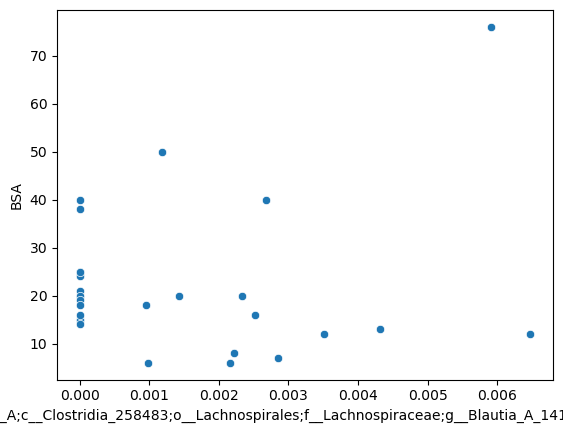

In [218]:
# metadata
df_meta = pd.read_csv(path + 'outputs/jobs51/psopsa_metadata.txt',
                      sep='\t',
                      index_col=0)

# format
df_meta.index.name = 'SampleID'
df_meta.columns = df_meta.columns.map(lambda x: x.split(':')[0])
df_meta['BSA'] = df_meta['BSA'].map(lambda x: float(x.split('%')[0]))
df_meta['BMI'] = df_meta['BMI'].astype(float)
df_meta.index = df_meta.index.map(lambda x: x.split('A.')[-1])

# import taxa
df_taxa = pd.read_csv(path + 'outputs/jobs51/taxa_table_L7.tsv', # 'outputs/jobs51/taxa_table_L6.tsv',
                      sep='\t',
                      skiprows=1,
                      index_col=0)

# format
df_taxa.index.name = 'SampleID'
df_taxa = df_taxa.T
df_taxa = df_taxa.div(df_taxa.sum(axis=1),axis=0)

# merge
df_merge = pd.concat([df_meta, df_taxa],axis=1)
df_merge = df_merge.dropna()

queries = ['Phasco','Rike','Bilophi','Alistipes','gnavus','Blautia']
intvar = []
for i in df_merge.columns.values:
    for q in queries:
        if q in i:
            intvar.append(i)

print(intvar)   

for x in intvar:
    for y in ['BMI','BSA','PASI']:
        r,p=scipy.stats.spearmanr(df_merge[x],df_merge[y])
        if p<0.2:
            if np.median(df_merge[x]) != 0:
                print(y)
                print(x)
                print(r,p)


x = 'd__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A_141781;s__Blautia_A_141781 faecis'
y = 'BSA'
sns.scatterplot(x=x,y=y,data=df_merge)

##### jobs52 #####

In [232]:
# amp aim from Adam's run
df_map = pd.read_csv(path + 'outputs/jobs52/Analysis_core_pipeline_taxonomic_0/tables/qiime_mapping_file.tsv',
                     sep='\t',
                     index_col=0)
df_map = df_map.drop('#q2:types')

# rename index
df_map.index.name = 'SampleID'

# subset cols
df_map = df_map[['Diagnosis','CRP','ESR']]
df_map['Diagnosis'] = df_map['Diagnosis'].map(lambda x: sub_dict[x] if x in sub_dict else x)

# AIMD grouping
df_map['AIMD'] = df_map['Diagnosis'].map(lambda x: 'HC' if x == 'HC' else 'AIMD')
df_map.head()

,Diagnosis,CRP,ESR,AIMD
SampleID,,,,
518-0-twin-psa-plate308,PsO,NaN,NaN,AIMD
524-0-twin-psa-plate308,PsO,NaN,NaN,AIMD
525-0-twin-psa-plate308,PsO,NaN,NaN,AIMD
528-0-twin-psa-plate308,PsO,NaN,NaN,AIMD
529-0-twin-psa-plate308,PsO,NaN,NaN,AIMD


In [233]:
df_map.Diagnosis.value_counts()

Diagnosis
RA     44
PsO    28
PsA    28
SjD    11
NSS     9
HC      6
SLE     5
Name: count, dtype: int64

In [234]:
# import taxa
df_taxa = pd.read_csv(path + 'outputs/jobs52/taxa_table_L7.tsv', # 'outputs/jobs51/taxa_table_L6.tsv',
                      sep='\t',
                      skiprows=1,
                      index_col=0)

# format
df_taxa.index.name = 'SampleID'
df_taxa = df_taxa.T
df_taxa = df_taxa.div(df_taxa.sum(axis=1),axis=0)
df_taxa.head()


SampleID,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter_A;__,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter_A;s__Methanobrevibacter_A smithii_A_1174,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera;s__Methanosphaera stadtmanae,d__Archaea;p__Thermoplasmatota;c__Thermoplasmata_1773;o__Methanomassiliicoccales;f__Methanomethylophilaceae;g__UBA71;s__UBA71 sp002506425,d__Bacteria;__;__;__;__;__;__,d__Bacteria;p__Actinobacteriota;__;__;__;__;__,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces;__,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces;s__Actinomyces graevenitzii,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia;__,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia;s__Pauljensenia sp000308055,...,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__UBA1829;g__UBA11452;s__,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__UBA1829;g__UBA1732;s__,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__Victivallaceae;g__Victivallis;s__Victivallis lenta,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__Victivallaceae;g__Victivallis;s__Victivallis vadensis,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;__;__,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__Merdousia;s__Merdousia gallistercoris,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__Merdousia;s__Merdousia sp000438015,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;__,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia muciniphila_D_776786,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia sp001580195
131-slesjo-plate308,0.0,0.000000,0.0,0.0,0.015836,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.114119
209-pso-plate307,0.0,0.000000,0.0,0.0,0.015516,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
235-psa-plate307,0.0,0.000000,0.0,0.0,0.006313,0.0,0.0,0.0,0.000421,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243498,0.000000
240-psa-plate307,0.0,0.000000,0.0,0.0,0.000381,0.0,0.0,0.0,0.000381,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076671,0.000000
241-pso-plate307,0.0,0.366338,0.0,0.0,0.017619,0.0,0.0,0.0,0.001025,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


SignificanceResult(statistic=-0.12504061005346917, pvalue=0.3630317593593534)


<Axes: xlabel='d__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A_141781;s__Blautia_A_141781 faecis', ylabel='CRP'>

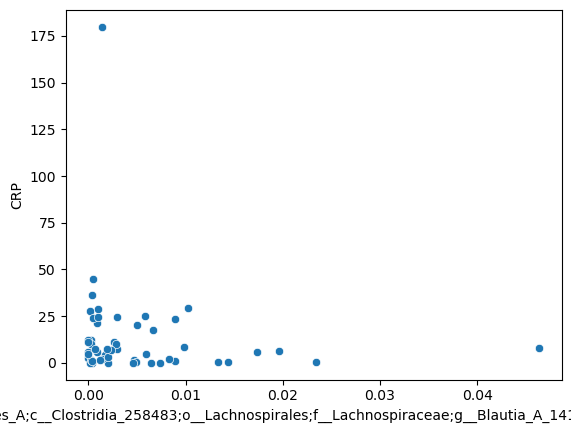

In [242]:
# merge with metadata
df_merge = pd.concat([df_taxa,df_map],axis=1)
df_merge['CRP'] = df_merge['CRP'].astype(float)
# df_merge['ESR'] = df_merge['ESR'].astype(float)

df_merge = df_merge.dropna(subset='CRP')
# df_merge = df_merge.dropna(subset='ESR')

x = 'd__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A_141781;s__Blautia_A_141781 faecis'
y='CRP'
# y='ESR'
print(scipy.stats.spearmanr(df_merge[x],df_merge[y]))
sns.scatterplot(x=x,y=y,data=df_merge)


In [249]:
# merge taxa
df_taxa = pd.read_csv(path + 'outputs/jobs52/Analysis_core_pipeline_taxonomic_0/tables/taxa_table_L6.tsv',
                      sep='\t',
                      skiprows=1,
                      index_col=0)

df_taxa.index.name = 'SampleID'
df_taxa = df_taxa.T
df_taxa = df_taxa.div(df_taxa.sum(axis=1),axis=0)

queries = ['Phasco']

for i in df_taxa.columns:
    for q in queries:
        if q in i:
            print(i)

df_taxa.head()

d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A


SampleID,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter_A,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,d__Archaea;p__Thermoplasmatota;c__Thermoplasmata_1773;o__Methanomassiliicoccales;f__Methanomethylophilaceae;g__UBA71,d__Bacteria;__;__;__;__;__,d__Bacteria;p__Actinobacteriota;__;__;__;__,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Varibaculum,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Bifidobacteriaceae;g__Alloscardovia,...,d__Bacteria;p__Spirochaetota;c__Spirochaetia;o__Treponematales;f__Treponemataceae;g__Treponema_D,d__Bacteria;p__Synergistota;c__Synergistia;o__Synergistales;f__Dethiosulfovibrionaceae;g__Pyramidobacter,d__Bacteria;p__Synergistota;c__Synergistia;o__Synergistales;f__Synergistaceae;g__Cloacibacillus,d__Bacteria;p__Verrucomicrobiota;c__Kiritimatiellae_777934;o__RFP12;f__UBA1067;g__Spyradenecus,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__UBA1829;g__UBA11452,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__UBA1829;g__UBA1732,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__Victivallaceae;g__Victivallis,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;__,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__Merdousia,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia
131-slesjo-plate308,0.000000,0.0,0.0,0.015836,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114119
209-pso-plate307,0.000000,0.0,0.0,0.015516,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
235-psa-plate307,0.000000,0.0,0.0,0.006313,0.0,0.0,0.000421,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243498
240-psa-plate307,0.000000,0.0,0.0,0.000381,0.0,0.0,0.000381,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076671
241-pso-plate307,0.366338,0.0,0.0,0.017619,0.0,0.0,0.001025,0.0,0.000158,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


##### jobs53 #####

In [6]:
# new mapping file with updated diagnoses
df_map = pd.read_csv(path + 'inputs/Q2_MSQ138_141_noctrl_noeiser_nocd_correct_new/qiime_mapping_file_batch_nocd.tsv', sep='\t', index_col=0)
q2row = df_map.iloc[0,:]
df_map = df_map.drop('#q2:types')

# drop patient 703.019.stamp from NSS as is really MG
df_map = df_map.drop('703.019.stamp')

# 702.013.stamp is RA not NSS

# 702.014.stamp is SjD not NSS



,BarcodeSequence,LinkerPrimerSequence,AmpliconWell,BSA,BSASeverityByBSA,CCPtiter,CRP,CurrentBiologics,CurrentIntralesionalSteroids,CurrentMTX,...,CCPpos,Disease,DiseaseDurationYears,OtherSubjectID,RFpos,Batch,EverTreated,Medication,DiseaseActive,AgeAtVisit
#SampleID,,,,,,,,,,,,,,,,,,,,,
518-0-twin-psa-plate308,AGCCCTGCTACA,CCGGACTACHVGGGTWTCTAAT,A3,1.5,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,CDP,NaN,NaN,NaN,NaN
524-0-twin-psa-plate308,AGTAAAGATCGT,CCGGACTACHVGGGTWTCTAAT,E3,4,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,CDP,NaN,NaN,NaN,NaN
525-0-twin-psa-plate308,TTGCTGGACGCT,CCGGACTACHVGGGTWTCTAAT,F3,2,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,CDP,NaN,NaN,NaN,NaN
528-0-twin-psa-plate308,CCTAACGGTCCA,CCGGACTACHVGGGTWTCTAAT,A4,3.5,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,CDP,NaN,NaN,NaN,NaN
529-0-twin-psa-plate308,TTCCTTAGTAGT,CCGGACTACHVGGGTWTCTAAT,B4,0,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,CDP,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702.013.stamp.plate313,CAGCCCTACCCA,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,MSQ141,Y,HCQ,NaN,51
702.014.stamp.plate313,CTATCTCCTGTC,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,MSQ141,N,NoMed,NaN,66
602.001.ellipss.plate313,GATATACCAGTG,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,MSQ141,Y,Topicals,Y,71


##### Alpha ##### 

In [5]:
# decide what to analyze
keep = ['SjD','HC','SLE','SLE-G',
        'PsA', 
        'axial spondyloarthritis','AxSpA',
        'RA','PsO']
jobs = ['jobs41', # weird SLE cohort
        'jobs44', 'jobs45',
        'jobs43',
        'jobs46','jobs47',
        'jobs48',
        'jobs49','jobs50','jobs51']

In [6]:
# alpha plots
for alpha_metric in ['shannon_entropy']:#, 'faith_pd']:
    # create list of dfs to concat
    dfs = []

    # for q2 mapping
    df = pd.read_csv(path + 'inputs/Q2_MSQ138_141_noctrl_noeiser_nocd_correct_new/' + alpha_metric + '_metadata.tsv', sep='\t')
    df = df.set_index('id')
    df = df.drop('#q2:types')

    # create cohort and do replacements
    df['cohort'] = 'AMPAIM'
    df = df.replace(sub_dict)

    # keep things only in consideratino
    df = df[df['Diagnosis'].isin(keep)]
        
    dfs.append(df)
    
    for job in jobs:
        # load df
        df = pd.read_csv(path + 'outputs/' + job + '/Analysis_core_pipeline_taxonomic_0/diversity/' + alpha_metric + '_metadata.tsv', sep='\t')
    
        # rename
        df = df.rename(columns={'host_disease':'Diagnosis'})
    
        # replace
        df = df.replace(sub_dict)
        
        # q2 modifications
        df = df.set_index('id')
        df = df.drop('#q2:types')
    
        # set cohort
        df['cohort'] = j_to_res[job]['Cohort']
    
        # append to list
        dfs.append(df)
    
    df_merge = pd.concat(dfs)
    df_merge = df_merge.dropna(how='any',axis=1)
    
    df_merge[alpha_metric] = df_merge[alpha_metric].astype(float)
    
    # filter
    df_merge = df_merge[df_merge['Diagnosis'].isin(keep)]

    # export
    df_merge.to_csv(path + 'outputs/jobs99/df_alpha_' + alpha_metric + '.tsv', sep='\t')

    # draw figure    
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_merge,x='cohort',y=alpha_metric,hue='Diagnosis',showfliers=False)
    #sns.stripplot(data=df_merge,x='cohort',y='shannon_entropy',hue='Diagnosis',legend=None,dodge=True,color='gray')
    sns.despine()
    plt.savefig(path + 'outputs/jobs99/alpha_meta_' + alpha_metric + '.pdf')
    plt.close()
#  plt.tight_layout()

df_merge.head()

,Diagnosis,shannon_entropy,cohort
id,,,
518-0-twin-psa-plate308,PsO,5.983555,AMPAIM
524-0-twin-psa-plate308,PsO,4.126833,AMPAIM
525-0-twin-psa-plate308,PsO,5.451687,AMPAIM
528-0-twin-psa-plate308,PsO,4.153750,AMPAIM
529-0-twin-psa-plate308,PsO,4.034945,AMPAIM


##### Beta #####

In [7]:
# beta plots
dfs = []
# ampaim
# df = pd.read_csv(path + 'inputs/Q2_MSQ138_141_noctrl_noeiser_nocd_correct_new/permanova-pairwise.csv')
df = pd.read_csv(path + 'inputs/Q2_MSQ138_141_noctrl_noeiser_nocd_correct/permanova-pairwise.csv')
df['cohort'] = 'AMPAIM'
df = df.replace(sub_dict)
df = df[df['Group 1'].isin(keep)]
df = df[df['Group 2'].isin(keep)]
df['comparison'] = df['Group 1'] + '_' + df['Group 2']
dfs.append(df)
# validation
for job in jobs:
    print(job)
    # load df
    df = pd.read_csv(path + 'outputs/' + job + '/Analysis_core_pipeline_taxonomic_0/diversity/permanova-pairwise.csv')
    
    # set cohort
    df['cohort'] = j_to_res[job]['Cohort']
    print(j_to_res[job]['Cohort'])

    # replace
    df = df.replace(sub_dict)
    
    # append to list
    dfs.append(df)

df_merge = pd.concat(dfs)
df_merge.index = [i for i in range(len(df_merge))]
df_merge = df_merge.dropna(how='any',axis=1)

# swap group2 HC with group1
# df_merge_final = df_merge.copy()
for i,row in df_merge.iterrows():
    print(i)
    if row.iloc[1] == 'HC':
        print('checking')
        temp = row.iloc[0]
        #print(temp)
        df_merge.iloc[i, 0] = 'HC'
        df_merge.iloc[i, 1] = temp

# df_merge['shannon_entropy'] = df_merge['shannon_entropy'].astype(float)

# filter
#keep = ['PsA','HC','SLE','SLE+G','SLE-G','RA','axial spondyloarthritis']
#df_merge = df_merge[df_merge['Diagnosis'].isin(keep)]

df_merge['-log10p'] = -1 * np.log10(df_merge['p-value'])
df_merge['Group 1'] = df_merge['Group 1'].replace(sub_dict)
df_merge['Group 2'] = df_merge['Group 2'].replace(sub_dict)


df = df_merge[df_merge['Group 1'] == 'HC']


df = df[df['Group 1'].isin(keep)]
df = df[df['Group 2'].isin(keep)]
df['Diagnosis'] = df['Group 2']

# save for R
df.to_csv(path + 'outputs/jobs99/df_beta.tsv', sep='\t')

plt.figure(figsize=(6,4))
sns.barplot(data=df,x='cohort',y='-log10p',hue='Diagnosis')#,showfliers=False)
sns.despine()
plt.savefig(path + 'outputs/jobs99/beta_permanova_pvals.pdf')
plt.close()
#sns.despine()
df.head()

jobs41
Valid1SLE
jobs44
Valid3SjD
jobs45
Valid5PsO
jobs43
Valid2AxSpA
jobs46
Valid4RA
jobs47
Valid8PsO
jobs48
Valid6SLE
jobs49
Valid7RA
jobs50
Valid10PsO
jobs51
Valid9PsD
0
checking
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
checking
30
31
32
33
34
35
36
37
38
39


,Group 1,Group 2,Sample size,Permutations,pseudo-F,p-value,q-value,cohort,-log10p,Diagnosis
0,HC,RA,49,999,1.582560,0.035,0.150,AMPAIM,1.455932,RA
5,HC,PsA,34,999,1.778235,0.020,0.140,AMPAIM,1.698970,PsA
6,HC,PsO,34,999,1.540251,0.048,0.150,AMPAIM,1.318759,PsO
7,HC,SLE,11,999,1.352017,0.117,0.189,AMPAIM,0.931814,SLE
8,HC,SjD,16,999,1.550664,0.050,0.150,AMPAIM,1.301030,SjD


##### LEfSe #####

In [32]:
# automatic parsing of pairwise lefses for queries
import itertools
# list(itertools.combinations(['A','B','C'], 2))

jobns = []
taxas = []
mwus = []
mwups = []
tts = []
ttps = []


# dict to store resluts
q_to_t = {}
queries = ['f__Rikenellaceae', 'g__Phasco','g__Prevotella']
# queries = ['f__Tannerell','g__Parabacter']
# queries = [x.replace('.','|') for x in LDAnan]
#queries = [x.replace('__','protect') for x in queries]
#queries = [x.replace('_','-') for x in queries]
#queries = [x.replace('protect','__') for x in queries]



# do MWU on each col and the aggregate
for q in queries:
    print('query: ' + q)

    # compile dfs 
    dfs = []
    for job in jobs:
        print(job)
        if 'jobs4' in job:
            df = pd.read_csv(path + 'outputs/' + job + '/Analysis_lefse_0/tables/Diagnosis/lefse_format.taxa_table_L7.Diagnosis.NA.tsv', 
                             sep='\t', 
                             header=None)
        else:
            # for AMPAIM jobs
            df = pd.read_csv(path + 'outputs/' + job + '/lefse_table.tsv', 
                             sep='\t',
                             header=None)
        df = df.T
        df.columns = df.iloc[0,:]
        df = df.drop(0) # drops the row of col names
        df = df.iloc[:,1:] # drops one of the Diagnosis cols
                
        # rename dx
        # df = df.rename(columns=dx_sub_dict)
                
        df['SampleID'] = job + '_' + df['HostSubjectId'] + '_' + df['Diagnosis'].replace(sub_dict)
        df = df.drop(['Diagnosis','HostSubjectId'], axis=1)
        df = df.set_index('SampleID')

        
        # normalize columns
        df = df.astype(float)
        df = df.div(df.sum(axis=1),axis=0)
        
        # put back diagnosis col
        df['Diagnosis'] = df.index.map(lambda x: x.split('_')[-1])

        # if AMPAIM job not jobs09, drop the healthy samples
        if job in ['jobs10','jobs11','jobs12','jobs13','jobs14']:
            df = df[df['Diagnosis'] != 'HC']
        
        # find relevant taxa to the query
        int_taxa = []
        for f in df.columns.values:
            if q in f:
                # print(f)
                int_taxa.append(f)
        print(len(int_taxa))
            
        # subset on taxa of interest
        df_sub = df[int_taxa] 
        
        # create new total 'collapsed genus'
        df_sub['total_' + q] = df_sub.sum(axis=1)
        
        # bring back Diagnosis column
        df_sub['Diagnosis'] = df['Diagnosis']
        
        # make cohort col
        df_sub['Cohort'] = j_to_res[job]['Cohort']

        #
        print(df_sub.Diagnosis.value_counts())
        # add to list of dfs
        dfs.append(df_sub)

    # create big df
    df_sub = pd.concat(dfs)

    # for the taxa
    for t in df_sub.columns:
        if '__' in t:
            diagnoses = df_sub['Diagnosis'].unique()
            
            # do all pairwise combos
            # for pair in list(itertools.combinations(diagnoses, 2)):
            #     d0, d1 = pair
            #     #print(t)
            #     #print(d0,d1)
            #     df_d0 = df_sub[df_sub['Diagnosis'] == d0]
            #     df_d1 = df_sub[df_sub['Diagnosis'] == d1]
            #     u,p1 = scipy.stats.mannwhitneyu(df_d0[t],df_d1[t])
            #     #print('MWU: u=' + str(np.round(u,2)) + ', p=' + str(np.round(p1,3)))
            #     r,p2 = scipy.stats.ttest_ind(df_d0[t],df_d1[t])
            #     #print('TT: t=' + str(np.round(r,2)) + ', p=' + str(np.round(p2,3)))
            #     #print('\n')
            #     jobns.append(job)
            #     taxas.append(t)
            #     mwus.append(u)
            #     mwups.append(p1)
            #     tts.append(r)
            #     ttps.append(p2)
        
            #     plt.figure(figsize=(4,3))
            #     sns.boxplot(data=df_sub, x='Diagnosis', y=t, showfliers=False)
            #     sns.stripplot(data=df_sub, x='Diagnosis', y=t,legend=None)
            #     plt.tight_layout()
            #     sns.despine()
            #     plt.savefig(path + 'outputs/jobs100/plots/' + d0 + '_' + d1 + '_' + t + '.pdf')
            #     plt.close()
        
            # boxplot across all studies
            plt.figure(figsize=(8,6))
            sns.boxplot(data=df_sub, x='Cohort',hue='Diagnosis', y=t, showfliers=False)
            # sns.stripplot(data=df_sub, x='Cohort', hue='Diagnosis', y=t,legend=None)
            plt.tight_layout()
            sns.despine()
            plt.savefig(path + 'outputs/jobs100/plots/all_' + t.split('f__')[-1] + '.pdf')
            plt.close()


df_ref = pd.DataFrame({'job': jobns, 'taxa': taxas, 'MWU': mwus, 'MWU_p': mwups, 'ttest': tts, 'ttest_p': ttps})
df_ref

query: f__Rikenellaceae
jobs41
11
Diagnosis
SLE+G    20
HC       20
SLE      17
Name: count, dtype: int64
jobs44
13
Diagnosis
SjD    63
HC     24
Name: count, dtype: int64
jobs45
11
Diagnosis
PsO    39
HC     21
Name: count, dtype: int64
jobs46
7
Diagnosis
RA    26
HC    26
Name: count, dtype: int64
jobs49
8
Diagnosis
PsO    26
HC      9
Name: count, dtype: int64
query: g__Phasco
jobs41
4
Diagnosis
SLE+G    20
HC       20
SLE      17
Name: count, dtype: int64
jobs44
6
Diagnosis
SjD    63
HC     24
Name: count, dtype: int64
jobs45
5
Diagnosis
PsO    39
HC     21
Name: count, dtype: int64
jobs46
4
Diagnosis
RA    26
HC    26
Name: count, dtype: int64
jobs49
1
Diagnosis
PsO    26
HC      9
Name: count, dtype: int64
query: g__Prevotella
jobs41
15
Diagnosis
SLE+G    20
HC       20
SLE      17
Name: count, dtype: int64
jobs44
55
Diagnosis
SjD    63
HC     24
Name: count, dtype: int64
jobs45
14
Diagnosis
PsO    39
HC     21
Name: count, dtype: int64
jobs46
14
Diagnosis
RA    26
HC    26
Name:

,job,taxa,MWU,MWU_p,ttest,ttest_p


##### Scratch #####

##### AMP AIM pc2 metacyc pathway analysis #####

In [ ]:
# taxa
df_taxa = pd.read_csv(path + 'outputs/jobs52/Analysis_core_pipeline_taxonomic_0/tables/taxa_table_L6.tsv',
                      sep='\t',
                      skiprows=1,
                      index_col=0)

df_taxa.index.name = 'SampleID'
df_taxa = df_taxa.T
df_taxa = df_taxa.div(df_taxa.sum(axis=1),axis=0)

queries = ['Phasco']

for i in df_taxa.columns:
    for q in queries:
        if q in i:
            print(i)

df_taxa.head()

In [ ]:
# pc2
df_pc = pd.read_csv("/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs52/Analysis_picrust2_0/picrust2_out/pathways_out/path_abun_unstrat.tsv", 
                    sep='\t',
                    index_col=0)

df_pc.head()

In [244]:
# grab mapping
df_mc = pd.read_csv(path + 'inputs/metacyc_pathways_info.txt', sep='\t', header=None)
df_mc.columns = ['pathway','metacyc']
df_mc = df_mc.set_index('pathway')

# merge with df_pc
df_mc = pd.concat([df_mc, df_pc], axis=1)
df_mc = df_mc.set_index('metacyc')

# remove pathways not present in taxa
df_mc = df_mc.dropna(axis=0)

# normalize and transpose
df_mc = df_mc.T
df_mc = df_mc.div(df_mc.sum(axis=1),axis=0)

# median and std of mean abund 
meanabunds = []
for i in df_mc.columns:
    meanabunds.append(np.nanmean(df_mc[i]))

print(np.median(meanabunds),np.mean(meanabunds), np.std(meanabunds,ddof=1))
df_mc.head()

0.0012068260011333235 0.002617801047120419 0.0030216046023464975


metacyc,N10-formyl-tetrahydrofolate biosynthesis,4-hydroxyphenylacetate degradation,superpathway of chorismate metabolism,homolactic fermentation,glycolysis III (from glucose),"superpathway of L-arginine, putrescine, and 4-aminobutanoate degradation","arginine, ornithine and proline interconversion",superpathway of arginine and polyamine biosynthesis,L-arginine biosynthesis II (acetyl cycle),L-arginine biosynthesis I (via L-ornithine),...,superpathway of thiamin diphosphate biosynthesis I,superpathway of L-threonine metabolism,superpathway of L-threonine biosynthesis,tRNA charging,L-tryptophan biosynthesis,L-tyrosine degradation I,superpathway of ubiquinol-8 biosynthesis (prokaryotic),UDP-N-acetyl-D-glucosamine biosynthesis I,L-valine degradation I,L-valine biosynthesis
131-slesjo-plate308,0.006503,0.000002,0.000477,0.008171,0.009021,0.000148,0.000575,0.001982,0.006773,0.006612,...,0.003028,0.000078,0.007363,0.007759,0.005301,0.000000,0.000201,0.006328,0.0,0.008562
209-pso-plate307,0.006352,0.000000,0.000333,0.007551,0.008680,0.000098,0.000239,0.002254,0.005957,0.005933,...,0.005254,0.000000,0.007848,0.007140,0.005482,0.000016,0.000227,0.004087,0.0,0.008231
235-psa-plate307,0.007063,0.000000,0.000000,0.006223,0.010017,0.000000,0.000462,0.001308,0.008127,0.007745,...,0.003434,0.000000,0.007637,0.007595,0.007730,0.000004,0.000005,0.003069,0.0,0.008976
240-psa-plate307,0.007016,0.000009,0.000064,0.006989,0.008837,0.000015,0.000552,0.001069,0.006539,0.006359,...,0.003926,0.000028,0.007785,0.007393,0.006748,0.000000,0.000019,0.003179,0.0,0.008729
241-pso-plate307,0.005847,0.000005,0.000337,0.007360,0.008594,0.000169,0.000261,0.000967,0.009771,0.009451,...,0.004408,0.000021,0.008446,0.009293,0.005945,0.000088,0.000178,0.009295,0.0,0.011398


In [118]:
# grab SCFA pathways
queries = [
    'buta', 'fatty acid'
]
tosum = []
for i in df_mc.columns:
    for q in queries:
        if q in i:
            print(i)
            #print(np.nanmean(df_mc[i]))
            tosum.append(i)

tosum=[
    # 'superpathway of L-arginine, putrescine, and 4-aminobutanoate degradation'
    'pyruvate fermentation to butanoate',
    'fatty acid &beta;-oxidation I',
    #'fatty acid elongation -- saturated',
    # 'superpathway of fatty acid biosynthesis initiation (E. coli)
    #'superpathway of (R,R)-butanediol biosynthesis',
    'L-lysine fermentation to acetate and butanoate',
    '4-aminobutanoate degradation V',
    'acetyl-CoA fermentation to butanoate II',
    'succinate fermentation to butanoate',
    #'superpathway of 2,3-butanediol biosynthesis',
    'glycerol degradation to butanol'
    #'fatty acid salvage'
    #'pyruvate fermentation to isobutanol (engineered)
]

df_mc['tosum'] = df_mc[tosum].sum(axis=1)
df_mc.tosum
# also probably want to look at the sum of all pathways

superpathway of L-arginine, putrescine, and 4-aminobutanoate degradation
pyruvate fermentation to butanoate
fatty acid &beta;-oxidation I
fatty acid elongation -- saturated
superpathway of fatty acid biosynthesis initiation (E. coli)
superpathway of (R,R)-butanediol biosynthesis
L-lysine fermentation to acetate and butanoate
4-aminobutanoate degradation V
acetyl-CoA fermentation to butanoate II
succinate fermentation to butanoate
superpathway of 2,3-butanediol biosynthesis
glycerol degradation to butanol
fatty acid salvage
pyruvate fermentation to isobutanol (engineered)


131-slesjo-plate308       0.006647
209-pso-plate307          0.002905
235-psa-plate307          0.002383
240-psa-plate307          0.002358
241-pso-plate307          0.003301
                            ...   
703.009.stamp.plate313    0.002699
703.010.stamp.plate313    0.004923
703.011.stamp.plate313    0.007105
703.013.stamp.plate313    0.005869
703.016.stamp.plate313    0.003942
Name: tosum, Length: 131, dtype: float64

SignificanceResult(statistic=-0.06129327581253521, pvalue=0.6724085532615465)


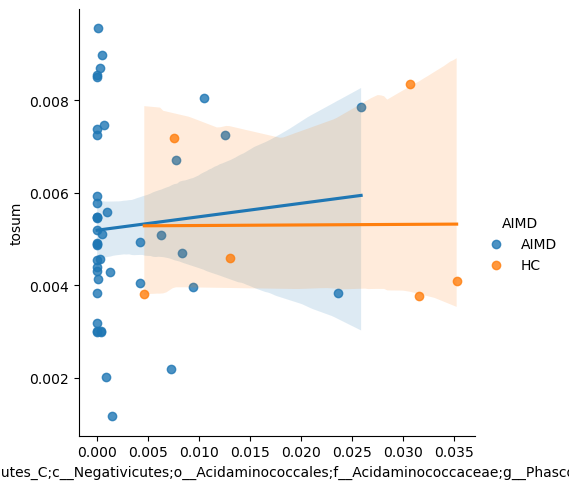

In [121]:
# plot
df_merge = pd.concat([df_taxa, df_map, df_mc],axis=1)
df_merge = df_merge[df_merge['Diagnosis'].isin(['RA','HC'])]

y='acetyl-CoA fermentation to butanoate II'
y='tosum'
x='d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A'

print(scipy.stats.spearmanr(df_merge[x],df_merge[y]))
sns.lmplot(x=x,y=y,data=df_merge,hue='AIMD')
sns.despine()

KruskalResult(statistic=67.64302030116086, pvalue=0.9999774452029498)
F_onewayResult(statistic=0.4004671919144345, pvalue=0.9999999993868739)


<Axes: xlabel='Diagnosis', ylabel='tosum'>

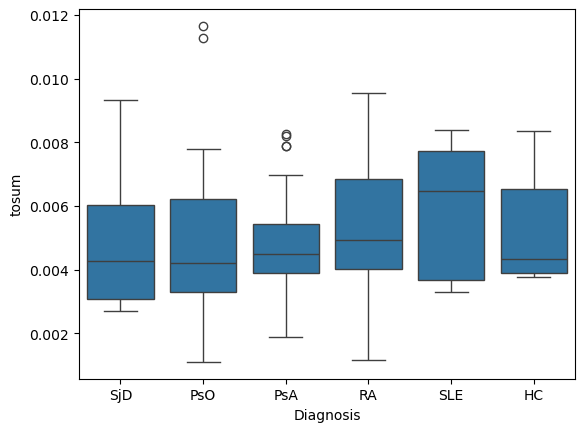

In [120]:
# plot
df_merge = pd.concat([df_taxa, df_map, df_mc],axis=1)
df_merge = df_merge[df_merge['Diagnosis'] != 'NSS']

#y='acetyl-CoA fermentation to butanoate II'
y='tosum'
x='d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A'

print(scipy.stats.kruskal(*[df_merge[df_merge['Diagnosis'] == d][y] for d in df_merge.Diagnosis]))
print(scipy.stats.f_oneway(*[df_merge[df_merge['Diagnosis'] == d][y] for d in df_merge.Diagnosis]))

sns.boxplot(x='Diagnosis',y=y,data=df_merge)
#sns.lmplot(x=x,y=y,data=df_merge,hue='AIMD')
#sns.despine()

##### AMP AIM pc2 briteKO pathway analysis #####

In [246]:
# df brite
df_br = pd.read_csv(path + 'outputs/jobs52/Analysis_picrust2_0/picrust2_out/KO_metagenome_out/pred_metagenome_unstrat_KB_briteko.tsv',
                    sep='\t',
                    index_col=0)
# normalize and transpose
df_br = df_br.T
df_br = df_br.div(df_br.sum(axis=1),axis=0)

# median and std of mean abund 
meanabunds = []
for i in df_br.columns:
    meanabunds.append(np.nanmean(df_br[i]))

print(np.median(meanabunds),np.mean(meanabunds), np.std(meanabunds,ddof=1))
df_mc.head()

0.00012110388321194696 0.002506265664160401 0.011438118958434908


metacyc,N10-formyl-tetrahydrofolate biosynthesis,4-hydroxyphenylacetate degradation,superpathway of chorismate metabolism,homolactic fermentation,glycolysis III (from glucose),"superpathway of L-arginine, putrescine, and 4-aminobutanoate degradation","arginine, ornithine and proline interconversion",superpathway of arginine and polyamine biosynthesis,L-arginine biosynthesis II (acetyl cycle),L-arginine biosynthesis I (via L-ornithine),...,superpathway of thiamin diphosphate biosynthesis I,superpathway of L-threonine metabolism,superpathway of L-threonine biosynthesis,tRNA charging,L-tryptophan biosynthesis,L-tyrosine degradation I,superpathway of ubiquinol-8 biosynthesis (prokaryotic),UDP-N-acetyl-D-glucosamine biosynthesis I,L-valine degradation I,L-valine biosynthesis
131-slesjo-plate308,0.006503,0.000002,0.000477,0.008171,0.009021,0.000148,0.000575,0.001982,0.006773,0.006612,...,0.003028,0.000078,0.007363,0.007759,0.005301,0.000000,0.000201,0.006328,0.0,0.008562
209-pso-plate307,0.006352,0.000000,0.000333,0.007551,0.008680,0.000098,0.000239,0.002254,0.005957,0.005933,...,0.005254,0.000000,0.007848,0.007140,0.005482,0.000016,0.000227,0.004087,0.0,0.008231
235-psa-plate307,0.007063,0.000000,0.000000,0.006223,0.010017,0.000000,0.000462,0.001308,0.008127,0.007745,...,0.003434,0.000000,0.007637,0.007595,0.007730,0.000004,0.000005,0.003069,0.0,0.008976
240-psa-plate307,0.007016,0.000009,0.000064,0.006989,0.008837,0.000015,0.000552,0.001069,0.006539,0.006359,...,0.003926,0.000028,0.007785,0.007393,0.006748,0.000000,0.000019,0.003179,0.0,0.008729
241-pso-plate307,0.005847,0.000005,0.000337,0.007360,0.008594,0.000169,0.000261,0.000967,0.009771,0.009451,...,0.004408,0.000021,0.008446,0.009293,0.005945,0.000088,0.000178,0.009295,0.0,0.011398


In [247]:
# grab SCFA pathways
queries = [
    'Buta', 'Propano','Lysine degradation'
]
tosum = []
for i in df_br.columns:
    for q in queries:
        if q in i:
            print(i)
            #print(np.nanmean(df_mc[i]))
            tosum.append(i)

#tosum=[
#]

df_br['tosum'] = df_br[tosum].sum(axis=1)
df_br.tosum
# also probably want to look at the sum of all pathways

Metabolism|Carbohydrate metabolism|Butanoate metabolism
Metabolism|Carbohydrate metabolism|Propanoate metabolism
Metabolism|Amino acid metabolism|Lysine degradation


131-slesjo-plate308       0.004148
209-pso-plate307          0.004567
235-psa-plate307          0.004614
240-psa-plate307          0.004453
241-pso-plate307          0.003641
                            ...   
703.009.stamp.plate313    0.004564
703.010.stamp.plate313    0.004804
703.011.stamp.plate313    0.004787
703.013.stamp.plate313    0.004136
703.016.stamp.plate313    0.004274
Name: tosum, Length: 131, dtype: float64

SignificanceResult(statistic=0.24065781653529225, pvalue=0.016985659203176334)
SignificanceResult(statistic=-0.5428571428571429, pvalue=0.26570262390670557)


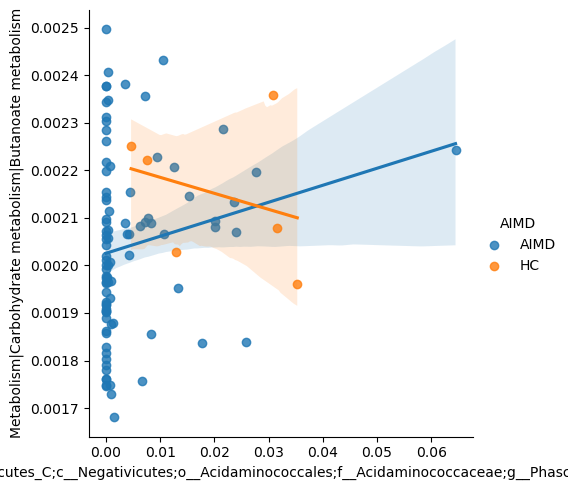

In [250]:
# plot
df_merge = pd.concat([df_taxa, df_map, df_br],axis=1)
df_merge = df_merge[df_merge['Diagnosis'].isin(['RA','HC', 'PsA', 'NSS','SjD'])]

#y='Metabolism|Carbohydrate metabolism|Propanoate metabolism'
y='Metabolism|Carbohydrate metabolism|Butanoate metabolism'
#y='Metabolism|Amino acid metabolism|Lysine degradation'
#y='tosum'
x='d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A'
print(scipy.stats.spearmanr(df_merge[x],df_merge[y]))
print(scipy.stats.spearmanr(df_merge[df_merge['Diagnosis']=='HC'][x],df_merge[df_merge['Diagnosis']=='HC'][y]))
sns.lmplot(x=x,y=y,data=df_merge,hue='AIMD')
sns.despine()

KruskalResult(statistic=70.9944458650577, pvalue=0.9781581240886654)
F_onewayResult(statistic=0.6845962240156207, pvalue=0.9918651091365589)
TtestResult(statistic=-1.5203043369356009, pvalue=0.13499497664294463, df=48.0)
TtestResult(statistic=-1.7383953301383461, pvalue=0.09175615356462012, df=32.0)
TtestResult(statistic=-0.6507813670861304, pvalue=0.5250318365475151, df=15.0)


<Axes: xlabel='Diagnosis', ylabel='Metabolism|Carbohydrate metabolism|Butanoate metabolism'>

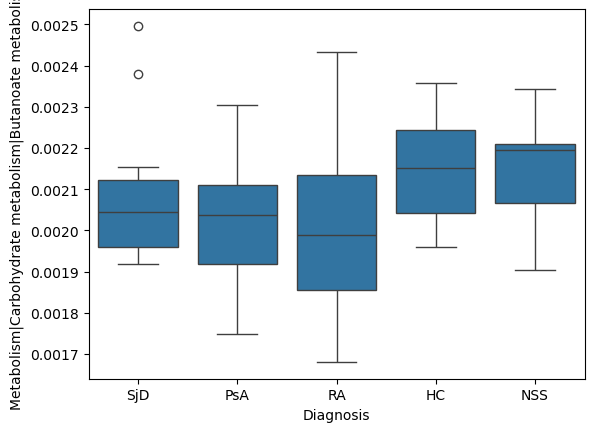

In [255]:
# plot
df_merge = pd.concat([df_taxa, df_map, df_br],axis=1)
df_merge = df_merge[df_merge['Diagnosis'].isin(['RA','HC', 'PsA', 'NSS','SjD'])]

y='tosum'
y='Metabolism|Carbohydrate metabolism|Butanoate metabolism'
# x='d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A'

print(scipy.stats.kruskal(*[df_merge[df_merge['Diagnosis'] == d][y] for d in df_merge.Diagnosis]))
print(scipy.stats.f_oneway(*[df_merge[df_merge['Diagnosis'] == d][y] for d in df_merge.Diagnosis]))
print(scipy.stats.ttest_ind(df_merge[df_merge['Diagnosis'] == 'RA'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))
print(scipy.stats.ttest_ind(df_merge[df_merge['Diagnosis'] == 'PsA'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))
print(scipy.stats.ttest_ind(df_merge[df_merge['Diagnosis'] == 'SjD'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))

sns.boxplot(x='Diagnosis',y=y,data=df_merge)
#sns.lmplot(x=x,y=y,data=df_merge,hue='AIMD')
#sns.despine()

##### jobs 46 #####

In [275]:
# df_map
jobn='jobs43'

df_map = pd.read_csv(path + 'outputs/' + jobn + '/Analysis_core_pipeline_taxonomic_0/tables/qiime_mapping_file.tsv',
                     sep='\t',
                     index_col=0)
df_map = df_map.drop('#q2:types')

# rename index
df_map.index.name = 'SampleID'

# subset cols
df_map = df_map.rename(columns={'host_disease': 'Diagnosis'})
#df_map = df_map[['Diagnosis','CRP','ESR']]
df_map['Diagnosis'] = df_map['Diagnosis'].map(lambda x: sub_dict[x] if x in sub_dict else x)

# AIMD grouping
# df_map['AIMD'] = df_map['Diagnosis'].map(lambda x: 'HC' if x == 'HC' else 'AIMD')
df_map.head()

#################

# df taxa
df_taxa = pd.read_csv(path + 'outputs/' + jobn + '/Analysis_core_pipeline_taxonomic_0/tables/taxa_table_L6.tsv',
                      sep='\t',
                      skiprows=1,
                      index_col=0)

df_taxa.index.name = 'SampleID'
df_taxa = df_taxa.T
df_taxa = df_taxa.div(df_taxa.sum(axis=1),axis=0)

queries = ['Phasco']

for i in df_taxa.columns:
    for q in queries:
        if q in i:
            print(i)

df_br = pd.read_csv(path + 'outputs/' + jobn + '/Analysis_picrust2_0/picrust2_out/KO_metagenome_out/pred_metagenome_unstrat_KB_briteko.tsv',
                    sep='\t',
                    index_col=0)

# normalize and transpose
df_br = df_br.T
df_br = df_br.div(df_br.sum(axis=1),axis=0)

# median and std of mean abund 
meanabunds = []
for i in df_br.columns:
    meanabunds.append(np.nanmean(df_br[i]))

print(np.median(meanabunds),np.mean(meanabunds), np.std(meanabunds,ddof=1))
df_mc.head()

#################

# grab SCFA pathways
queries = [
    'Buta', 'Propano','Lysine degradation'
]
tosum = []
for i in df_br.columns:
    for q in queries:
        if q in i:
            print(i)
            #print(np.nanmean(df_mc[i]))
            tosum.append(i)

#tosum=[
#]

df_br['tosum'] = df_br[tosum].sum(axis=1)
# df_br.tosum
# also probably want to look at the sum of all pathways

##########


d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A
0.00012408236677471777 0.0025380710659898475 0.011437302394878918
Metabolism|Carbohydrate metabolism|Butanoate metabolism
Metabolism|Carbohydrate metabolism|Propanoate metabolism
Metabolism|Amino acid metabolism|Lysine degradation


SignificanceResult(statistic=0.24541202831801334, pvalue=0.07366815369455276)
SignificanceResult(statistic=0.19984305810037514, pvalue=0.3605926316002378)


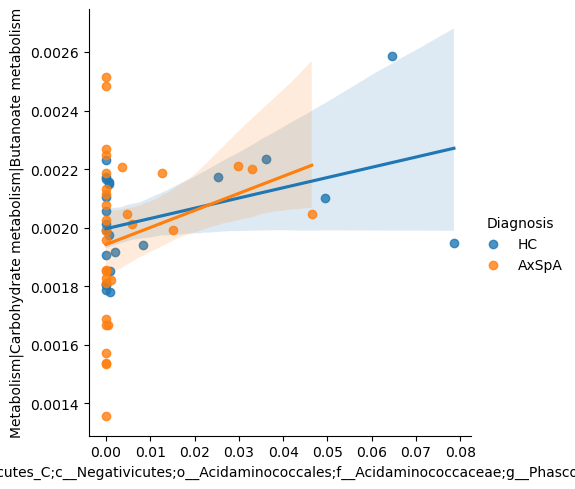

In [276]:
# plot
df_merge = pd.concat([df_taxa, df_map, df_br],axis=1)
# df_merge = df_merge[df_merge['Diagnosis'].isin(['RA','HC', 'PsA', 'NSS','SjD'])]

#y='Metabolism|Carbohydrate metabolism|Propanoate metabolism'
y='Metabolism|Carbohydrate metabolism|Butanoate metabolism'
#y='Metabolism|Amino acid metabolism|Lysine degradation'
#y='tosum'
x='d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A'
print(scipy.stats.spearmanr(df_merge[x],df_merge[y]))
print(scipy.stats.spearmanr(df_merge[df_merge['Diagnosis']=='HC'][x],df_merge[df_merge['Diagnosis']=='HC'][y]))
sns.lmplot(x=x,y=y,data=df_merge,hue='Diagnosis')
sns.despine()

KruskalResult(statistic=76.62983098683625, pvalue=0.0185426511944029)
F_onewayResult(statistic=1.0860701604441325, pvalue=0.3143484636441151)
TtestResult(statistic=-1.4194537947749244, pvalue=0.16173390870498627, df=52.0)
MannwhitneyuResult(statistic=266.0, pvalue=0.092384876410412)


<Axes: xlabel='Diagnosis', ylabel='d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A'>

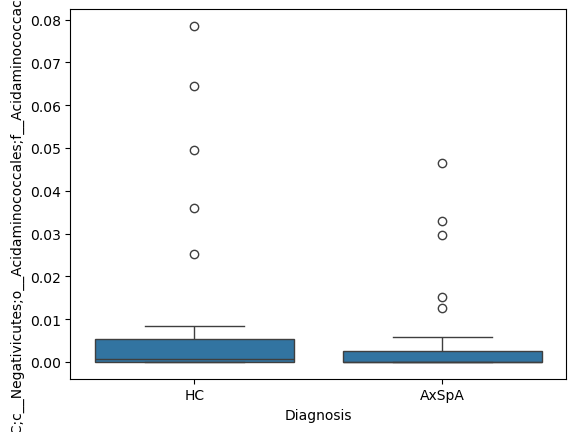

In [284]:
# plot
df_merge = pd.concat([df_taxa, df_map, df_br],axis=1)
# df_merge = df_merge[df_merge['Diagnosis'].isin(['RA','HC', 'PsA', 'NSS','SjD'])]

y='tosum'
y='Metabolism|Carbohydrate metabolism|Butanoate metabolism'
y='d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A'

print(scipy.stats.kruskal(*[df_merge[df_merge['Diagnosis'] == d][y] for d in df_merge.Diagnosis]))
print(scipy.stats.f_oneway(*[df_merge[df_merge['Diagnosis'] == d][y] for d in df_merge.Diagnosis]))
print(scipy.stats.ttest_ind(df_merge[df_merge['Diagnosis'] == 'AxSpA'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))
print(scipy.stats.mannwhitneyu(df_merge[df_merge['Diagnosis'] == 'AxSpA'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))
#print(scipy.stats.ttest_ind(df_merge[df_merge['Diagnosis'] == 'PsA'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))
#print(scipy.stats.ttest_ind(df_merge[df_merge['Diagnosis'] == 'SjD'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))

sns.boxplot(x='Diagnosis',y=y,data=df_merge)
#sns.lmplot(x=x,y=y,data=df_merge,hue='AIMD')
#sns.despine()

In [283]:
df_merge['Diagnosis']

SRR21283011       HC
SRR21283012    AxSpA
SRR21283014       HC
SRR21283015       HC
SRR21283016    AxSpA
SRR21283017    AxSpA
SRR21283019    AxSpA
SRR21283020       HC
SRR21283021    AxSpA
SRR21283022       HC
SRR21283023       HC
SRR21283024    AxSpA
SRR21283025    AxSpA
SRR21283026    AxSpA
SRR21283027    AxSpA
SRR21283028    AxSpA
SRR21283030       HC
SRR21283031    AxSpA
SRR21283032       HC
SRR21283033    AxSpA
SRR21283034       HC
SRR21283035       HC
SRR21283064    AxSpA
SRR21283065       HC
SRR21283066    AxSpA
SRR21841064       HC
SRR21841075    AxSpA
SRR21841086    AxSpA
SRR21841089       HC
SRR21841098       HC
SRR21841109       HC
SRR21841125    AxSpA
SRR21841127    AxSpA
SRR21841128       HC
SRR21841129       HC
SRR21841130       HC
SRR21841131       HC
SRR21841132       HC
SRR21841133       HC
SRR21841134    AxSpA
SRR21841135    AxSpA
SRR21841136    AxSpA
SRR21841137    AxSpA
SRR21841138    AxSpA
SRR21841139    AxSpA
SRR21841140    AxSpA
SRR21841141    AxSpA
SRR21841142  